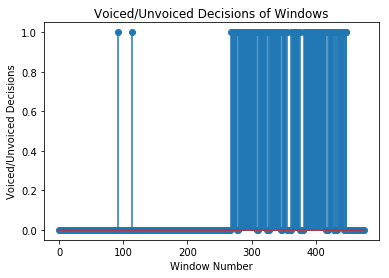

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 1024

def ece420ProcessFrame(frame):
    isVoiced = 0

    energy = 0
    
    for i in range(len(frame)):
        energy = energy + frame[i]*frame[i]

    if(energy>990000000):
        isVoiced = 1
        
    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_audio.wav')

numFrames = int(len(data) / 1024)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * 1024 : (i+1)*1024]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.xlabel("Window Number") # Text for X-Axis
plt.ylabel("Voiced/Unvoiced Decisions") # 1 is for voiced, 0 is for unvoiced
plt.title("Voiced/Unvoiced Decisions of Windows")
plt.show()

By trying out several values, I think 11000000 is a good threshold for voiced and unvoiced decisions. By listening to the given speech sound, we can see the duration from the second to the sixth second has human speaking, while the other durations mainly have silence. Our results have the right decisions for the human speaking part. As for the beginning and end of the signal, our program generates the right unvoiced decisions for most of the parts. If you listen to the given speech carefully, there are some mild beaps in the background when the person isn't speaking. That may be the reason for the occasional voiced decisions in the silence bands.

In [17]:
fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

In [18]:
# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

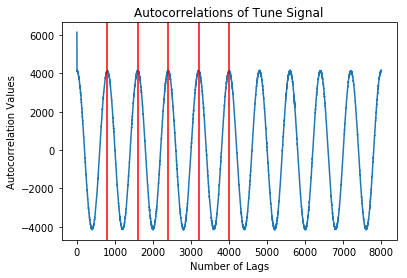

In [21]:
total = len(tune)

auto = np.zeros(total) # Arrays used to hold autocorrelation results

# Accumulate the convolution sum
for l in range(total):
    for i in range(total):
        auto[l] = auto[l] + tune[i]*tune[(i+l)%total]
        
plt.figure()
plt.plot(auto)
plt.xlabel("Number of Lags")
plt.ylabel("Autocorrelation Values") # 1 is for voiced, 0 is for unvoiced
plt.title("Autocorrelations of Tune Signal")
plt.axvline(800, color='red')
plt.axvline(1600, color='red')
plt.axvline(2400, color='red')
plt.axvline(3200, color='red')
plt.axvline(4000, color='red')
plt.show()

The autocorrelation is maximized when the lag is zero. This makes sense because the signal is the most similar to itself. Then, the smallest lag that can maximizes the autocorrelation is 800, as indicated in the plot above. In fact, the autocorrelation is maximized after every 800 lags. The time that these 800 lags correspond to is 800T = 800/F = 800/8000 = 0.1 seconds. Then the signal frequency that corresponds to the lag is 1/0.1 = 10 Hz. This makes sense because the original signal is a 10Hz sinusoidal.

In [10]:
print(data)

[ 1 -4  5 ..., 59  8 35]


In [14]:
print(data[1:600])

[ -4   5  -5   4  -3   2  -1   2  -4   5  -6   5  -4   2   0  -1   3  -5
   6  -7   7  -6   6  -5   3  -2   0   1  -1  -1   1  -2   5  -5   6  -7
   4   1  -1   2   0  -2   3   0  -1   1   0   0   0  -1   1  -1   3  -4
   2  -1   0   0  -2  -1   3  -4   3  -2   1  -1   2  -2   1  -1   3  -2
   2  -4   3  -2   2  -3   1  -2  -1   3  -5   4  -3   1   1  -2   1   1
  -3   2  -2   1   0   1  -2   2  -2   0   2  -3   3  -1   0   1   1  -2
   1   0  -2   3  -3   3  -3   3  -1  -1   3  -3   2  -1  -1   3  -2   3
  -2   2  -3   4  -5   3  -3   4  -5   6  -8   5  -3   1   0   0  -2   2
  -1  -1   1  -1   4  -3   2  -2   3  -4   4  -4   4  -3   0   0   0   0
   2  -1  -1   4  -6   5  -4   0   2  -2   2   0   0   0   2  -3   2  -1
   2  -1   0   3  -3   4  -3   2  -2   2  -2   3  -4   3  -4   5  -2   0
   1  -4   5  -3   1  -1   1   0   0  -1  -1   1  -1  -1   1  -2   0  -1
   0   2  -1  -2   0   0   1  -1   1  -1  -1   1  -1   2  -2   5  -5   4
  -4   3   0   2   0  -1   1   0   1   1  -3   2  -

In [ ]:
from IPython.display import Audio
import sys
Audio(data, rate=Fs)